# Yash Meshram (18110192)

# Assignment-5

# question 2

In [1]:
import math
import numpy as np

def deg(theta):
    rad = (math.pi/180)*theta
    return rad

def cos(q):
    return math.cos(deg(q))

def sin(q):
    return math.sin(deg(q))

def atan(q1, q2):
    return (180/math.pi)*math.atan(q1/q2)

In [2]:
# Inputs
n = 3                                     # Number of links
s = 'RRP'                                 # Type of joints

l1 = 10    # m
l2 = 10    # m
q_1 = 30    # deg.
q_2 = 45    # deg.
d_  =  5    # m
m1 =  5    # kg
m2 =  5    # kg
m3 =  3    # kg

In [3]:
from sympy import * 

q1, q2, d = symbols('q1 q2 d')

x1 = np.array([[   0  ],
               [   0  ],
               [ l1/2 ]])

x2 = np.array([[ (l2/2)*cos(q2)*cos(q1) ],
               [ (l2/2)*cos(q2)*sin(q1) ],
               [    l1 + (l2/2)*sin(q2) ]])

x3 = np.array([[ (l2 + d/2)*cos(q2)*cos(q1) ],
               [ (l2 + d/2)*cos(q2)*sin(q1) ],
               [    l1 + (l2 + d/2)*sin(q2) ]]) 

In [4]:
Jv1 = np.zeros((3, 3))
Jv2 = np.zeros((3, 3))
Jv3 = np.zeros((3, 3))

p1 = []
p2 = []
p3 = []

q_1_ = q_1*np.pi/180    # deg.
q_2_ = q_2*np.pi/180    # deg.

for i in range(len(x1)):
    f = Derivative(x1[i][0], q1).doit()
    f1 = lambdify(q1, f)
    Jv1[i][0] = f1(q_1_)
    p_1 = np.append([], [f, 0, 0])
    p1.append(p_1)
    
    f = Derivative(x2[i][0], q1).doit()
    f1 = lambdify([q1, q2], f)
    Jv2[i][0] = f1(q_1_, q_2_)
    
    f_ = Derivative(x2[i][0], q2).doit()
    f1 = lambdify([q1, q2], f_)
    Jv2[i][1] = f1(q_1_, q_2_)
    p_2 = np.append([], [f, f_, 0])
    p2.append(p_2)
    
    f = Derivative(x3[i][0], q1).doit()
    f1 = lambdify([q1, q2, d], f)
    Jv3[i][0] = f1(q_1_, q_2_, d_)
    
    f_ = Derivative(x3[i][0], q2).doit()
    f1 = lambdify([q1, q2, d], f_)
    Jv3[i][1] = f1(q_1_, q_2_, d_)
    
    f__ = Derivative(x3[i][0], d).doit()
    f1 = lambdify([q1, q2, d], f__)
    Jv3[i][2] = f1(q_1_, q_2_, d_)
    p_3 = np.append([], [f, f_, f__])
    p3.append(p_3)

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

In [5]:
# w1 = q1_dot*k
# w2 = -q2_dot*j + q1_dot*k
# w3 = -q2_dot*j + q1_dot*k

In [6]:
a1 = np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 0, 0]])

a2 = np.array([[0,  0, 0],
               [0, -1, 0],
               [1,  0, 0]])

a3 = np.array([[0,  0,  0],
               [0, -1,  0],
               [1,  0,  0]])

a1 = np.dot(np.transpose(a1), a1)
a2 = np.dot(np.transpose(a2), a2)
a3 = np.dot(np.transpose(a3), a3)

I1 = 0      # approxly zero
I2 = (1/3)*m2*l2
I3 = 0

I = I1*a1 + I2*a2 + I3*a3

D_ = m1*Jv1 + m2*Jv2 + m3*Jv3 + I
D = m1*p1 + m2*p2 + m3*p3 + I

In [7]:
q = [q1, q2, d]
def C(i, j, k):
    i = i-1
    j = j-1
    k = k-1
    
    c1 = Derivative(D[k,j], q[i]).doit()
    c2 = Derivative(D[k,i], q[j]).doit()
    c3 = Derivative(D[i,j], q[k]).doit()
    
    C = (1/2)*(c1 + c2 - c3)
    f1 = lambdify([q1, q2, d], C)
    return C

In [8]:
g = 9.81   # m/s
V = m1*g*(l1/2) + m2*g*(l1 + (l2/2)*sin(q2)) + m3*g*(l1 + (l2 + d/2)*sin(q2))

In [9]:
def Phi(V, q):
    phi_1 = Derivative(V, q[0]).doit()
    phi_2 = Derivative(V, q[1]).doit()
    phi_3 = Derivative(V, q[2]).doit()

    phi_ = [phi_1, phi_2, phi_3]
    return phi_

phi = Phi(V, q)

In [10]:
t = symbols('t')
def T(i):
    if i > 3 or i < 1:
        return "Insert number from 1 to "+str(n)
    i = i-1
    d_term = 0
    for j in range(n):
        d_term = d_term + D[i, j]*Derivative(q[j], (t, 2))
    c_term = 0
    for j in range(n):
        for k in range(n):
            c_term = c_term + C(j+1, k+1, i+1)*Derivative(q[j], t)*Derivative(q[k], t)
    phi_term = phi[i]
    
    T_ = d_term + c_term + phi_term
    return T_

In [11]:
T1 = T(1)
T2 = T(2)
T3 = T(3)

print("T1 = \n", T1, "\n")
print("T2 = \n", T2, "\n")
print("T3 = \n", T3)

T1 = 
 (-1.5*sin(q2)*cos(q1) - 0.75*cos(q1)*cos(q2))*Derivative(d, t)*Derivative(q2, t) + (-0.5*(-3*d/2 - 30)*sin(q1)*sin(q2) + 12.5*sin(q1)*sin(q2))*Derivative(q1, t)*Derivative(q2, t) + (0.5*(-3*d/2 - 30)*cos(q1)*cos(q2) - 12.5*cos(q1)*cos(q2))*Derivative(q1, t)**2 + (-3*(d/2 + 10)*sin(q2)*cos(q1) - 25.0*sin(q2)*cos(q1))*Derivative(q2, (t, 2)) + (-3*(d/2 + 10)*sin(q1)*cos(q2) - 25.0*sin(q1)*cos(q2) + 16.6666666666667)*Derivative(q1, (t, 2)) + (-1.0*(-3*d/2 - 30)*sin(q1)*sin(q2) + 0.5*(3*d/2 + 30)*sin(q1)*cos(q2) + 25.0*sin(q1)*sin(q2) + 12.5*sin(q1)*cos(q2))*Derivative(q1, t)*Derivative(q2, t) + (-0.5*(-3*d/2 - 30)*sin(q2)*cos(q1) + 1.0*(-3*d/2 - 30)*cos(q1)*cos(q2) + 12.5*sin(q2)*cos(q1) - 25.0*cos(q1)*cos(q2))*Derivative(q2, t)**2 - 2.25*sin(q1)*cos(q2)*Derivative(d, t)*Derivative(q1, t) - 1.5*sin(q2)*cos(q1)*Derivative(d, t)*Derivative(q2, t) + 3*cos(q1)*cos(q2)*Derivative(d, (t, 2))/2 

T2 = 
 (14.715*d + 294.3)*cos(q2) + (0.75*sin(q2)*cos(q1) + 1.5*cos(q1)*cos(q2))*Derivative(d,

In [30]:
import control.matlab as control
import matplotlib.pyplot as plt
%matplotlib inline

For link 1 

G = 
 
          0.9 s + 0.05
--------------------------------
0.0702 s^3 + s^2 + 0.72 s + 0.04



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 2 

G = 
 
           0.9 s + 0.03
----------------------------------
0.02652 s^3 + s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 3 

G = 
 
           0.9 s + 0.03
----------------------------------
0.05007 s^3 + s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

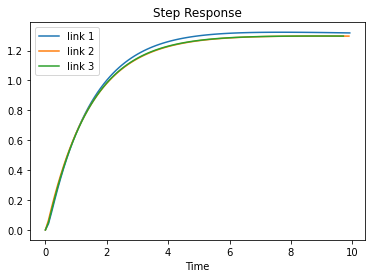

In [13]:
# for Link 1

Jeff = 0.074 + 0.0007*D_[0,0]
Beff = 1
K = 0.8
Kp = 0.9
KI = 0.05
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 1 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 1")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 2

Jeff = 0.03 + 0.00064*D_[1,1]
Beff = 1
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 2 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 2")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 3

Jeff = 0.05 + 0.000064*D_[2,2]
Beff = 1
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 3 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 3")
plt.xlabel('Time')
plt.title('Step Response')

plt.legend()

# question 3

In [14]:
# Inputs
n = 3                                     # Number of links
s = 'RRP'                                 # Type of joints

l1 = 10    # m
l2 = 10    # m
q_1 = 30    # deg.
q_2 = 45    # deg.
d_  =  5    # m
m1 =  5    # kg
m2 =  5    # kg
m3 =  3    # kg

In [15]:
q1, q2, d, t = symbols('q1 q2 d t')

x1 = np.array([[ (l1/2)*cos(q1) ],
               [ (l1/2)*sin(q1) ],
               [       0        ]])

x2 = np.array([[ l1*cos(q1) + (l2/2)*cos(q1+q2) ],
               [ l1*sin(q1) + (l2/2)*sin(q1+q2) ],
               [                0               ]])

x3 = np.array([[ l1*cos(q1) + l2*cos(q1+q2) ],
               [ l1*sin(q1) + l2*sin(q1+q2) ],
               [            -d/2            ]]) 

In [16]:
Jv1 = np.zeros((3, 3))
Jv2 = np.zeros((3, 3))
Jv3 = np.zeros((3, 3))

p1 = []
p2 = []
p3 = []

q_1_ = q_1*np.pi/180    # deg.
q_2_ = q_2*np.pi/180    # deg.

for i in range(len(x1)):
    f = Derivative(x1[i][0], q1).doit()
    f1 = lambdify(q1, f)
    Jv1[i][0] = f1(q_1_)
    p_1 = np.append([], [f, 0, 0])
    p1.append(p_1)
    
    f = Derivative(x2[i][0], q1).doit()
    f1 = lambdify([q1, q2], f)
    Jv2[i][0] = f1(q_1_, q_2_)
    
    f_ = Derivative(x2[i][0], q2).doit()
    f1 = lambdify([q1, q2], f_)
    Jv2[i][1] = f1(q_1_, q_2_)
    p_2 = np.append([], [f, f_, 0])
    p2.append(p_2)
    
    f = Derivative(x3[i][0], q1).doit()
    f1 = lambdify([q1, q2, d], f)
    Jv3[i][0] = f1(q_1_, q_2_, d_)
    
    f_ = Derivative(x3[i][0], q2).doit()
    f1 = lambdify([q1, q2, d], f_)
    Jv3[i][1] = f1(q_1_, q_2_, d_)
    
    f__ = Derivative(x3[i][0], d).doit()
    f1 = lambdify([q1, q2, d], f__)
    Jv3[i][2] = f1(q_1_, q_2_, d_)
    p_3 = np.append([], [f, f_, f__])
    p3.append(p_3)

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

In [17]:
# w1 = q1_dot*k
# w2 = q1_dot*k + q2_dot*k
# w3 = q1_dot*k + q2_dot*k

In [18]:
a1 = np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 0, 0]])

a2 = np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 1, 0]])

a3 = np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 1, 0]])

a1 = np.dot(np.transpose(a1), a1)
a2 = np.dot(np.transpose(a2), a2)
a3 = np.dot(np.transpose(a3), a3)

I1 = (1/3)*m1*l1
I2 = (1/3)*m2*l2
I3 = 0

I = I1*a1 + I2*a2 + I3*a3

D_ = m1*Jv1 + m2*Jv2 + m3*Jv3 + I
D = m1*p1 + m2*p2 + m3*p3 + I

In [19]:
q = [q1, q2, d]
V = -m3*g*(d/2)
phi = Phi(V, q)

In [20]:
T1 = T(1)
T2 = T(2)
T3 = T(3)

print("T1 = \n", T1, "\n")
print("T2 = \n", T2, "\n")
print("T3 = \n", T3)

T1 = 
 (16.6666666666667 - 55.0*sin(q1 + q2))*Derivative(q2, (t, 2)) + (27.5*sin(q1 + q2) - 55.0*cos(q1 + q2))*Derivative(q2, t)**2 + (-52.5*cos(q1) - 27.5*cos(q1 + q2))*Derivative(q1, t)**2 + (-105.0*sin(q1) - 55.0*sin(q1 + q2) + 33.3333333333333)*Derivative(q1, (t, 2)) + (52.5*sin(q1) + 27.5*sin(q1 + q2) - 55.0*cos(q1 + q2))*Derivative(q1, t)*Derivative(q2, t) - 27.5*cos(q1 + q2)*Derivative(q1, t)*Derivative(q2, t) 

T2 = 
 (-55.0*sin(q1 + q2) + 27.5*cos(q1 + q2))*Derivative(q1, t)*Derivative(q2, t) + (55.0*cos(q1 + q2) + 16.6666666666667)*Derivative(q2, (t, 2)) + (-105.0*sin(q1) - 55.0*sin(q1 + q2) + 27.5*cos(q1 + q2))*Derivative(q1, t)**2 + (105.0*cos(q1) + 55.0*cos(q1 + q2) + 16.6666666666667)*Derivative(q1, (t, 2)) - 27.5*sin(q1 + q2)*Derivative(q1, t)*Derivative(q2, t) - 27.5*sin(q1 + q2)*Derivative(q2, t)**2 

T3 = 
 -1.5*Derivative(d, (t, 2)) - 14.715


For link 1 

G = 
 
             0.9 s + 0.03
---------------------------------------
0.05373 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 2 

G = 
 
             0.9 s + 0.03
---------------------------------------
0.01994 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 3 

G = 
 
             0.9 s + 0.03
--------------------------------------
0.0499 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

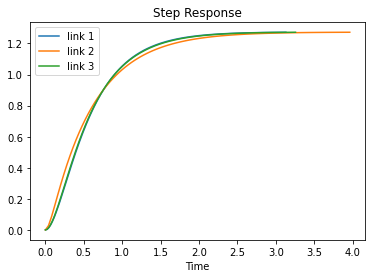

In [21]:
# for Link 1

Jeff = 0.1 + 0.00064*D_[0,0]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 1 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 1")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 2

Jeff = 0.00016 + 0.00064*D_[1,1]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 2 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 2")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 3

Jeff = 0.05 + 0.000064*D_[2,2]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 3 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 3")
plt.xlabel('Time')
plt.title('Step Response')

plt.legend()

# question 4

In [22]:
# Inputs
n = 3                                     # Number of links
s = 'RRR'                                 # Type of joints

l1 = 10    # m
l2 = 10    # m
l3 = 10    # m
q_1 = 30    # deg.
q_2 = 45    # deg.
q_3 = 60    # deg.
m1 =  8    # kg
m2 =  5    # kg
m3 =  6    # kg

In [23]:
q1, q2, q3, t = symbols('q1 q2 q3 t')

x1 = np.array([[   0  ],
               [   0  ],
               [ l1/2 ]])

x2 = np.array([[ (l2/2)*cos(q2)*cos(q1) ],
               [ (l2/2)*cos(q2)*sin(q1) ],
               [    l1 + (l2/2)*sin(q2) ]])

x3 = np.array([[ (l2*cos(q2) + (l3/2)*cos(q2+q3))*cos(q1) ],
               [ (l2*cos(q2) + (l3/2)*cos(q2+q3))*sin(q1) ],
               [    l1 + l2*sin(q2) + (l3/2)*sin(q2+q3)   ]])

In [24]:
Jv1 = np.zeros((3, 3))
Jv2 = np.zeros((3, 3))
Jv3 = np.zeros((3, 3))

p1 = []
p2 = []
p3 = []

q_1_ = q_1*np.pi/180    # deg.
q_2_ = q_2*np.pi/180    # deg.
q_3_ = q_3*np.pi/180    # deg.

for i in range(len(x1)):
    f = Derivative(x1[i][0], q1).doit()
    f1 = lambdify(q1, f)
    Jv1[i][0] = f1(q_1_)
    p_1 = np.append([], [f, 0, 0])
    p1.append(p_1)
    
    f = Derivative(x2[i][0], q1).doit()
    f1 = lambdify([q1, q2], f)
    Jv2[i][0] = f1(q_1_, q_2_)
    
    f_ = Derivative(x2[i][0], q2).doit()
    f1 = lambdify([q1, q2], f_)
    Jv2[i][1] = f1(q_1_, q_2_)
    p_2 = np.append([], [f, f_, 0])
    p2.append(p_2)
    
    f = Derivative(x3[i][0], q1).doit()
    f1 = lambdify([q1, q2, q3], f)
    Jv3[i][0] = f1(q_1_, q_2_, q_3_)
    
    f_ = Derivative(x3[i][0], q2).doit()
    f1 = lambdify([q1, q2, q3], f_)
    Jv3[i][1] = f1(q_1_, q_2_, q_3_)
    
    f__ = Derivative(x3[i][0], d).doit()
    f1 = lambdify([q1, q2, q3], f__)
    Jv3[i][2] = f1(q_1_, q_2_, q_3_)
    p_3 = np.append([], [f, f_, f__])
    p3.append(p_3)

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

In [25]:
# w1 = q1_dot*k
# w2 = q1_dot*k - q2_dot*j
# w3 = q1_dot*k - q2_dot*j - q3_dot*j

In [26]:
a1 = np.array([[0, 0, 0],
               [0, 0, 0],
               [1, 0, 0]])

a2 = np.array([[0,  0, 0],
               [0, -1, 0],
               [1,  0, 0]])

a3 = np.array([[0,  0,  0],
               [0, -1, -1],
               [1,  0,  0]])

a1 = np.dot(np.transpose(a1), a1)
a2 = np.dot(np.transpose(a2), a2)
a3 = np.dot(np.transpose(a3), a3)

I1 = (1/3)*m1*l1
I2 = (1/3)*m2*l2
I3 = (1/3)*m3*l3

I = I1*a1 + I2*a2 + I3*a3

D_ = m1*Jv1 + m2*Jv2 + m3*Jv3 + I
D = m1*p1 + m2*p2 + m3*p3 + I

In [27]:
q = [q1, q2, q3]
V = m1*g*(l1/2) + m2*g*(l1 + (l2/2)*sin(q2)) + m3*g*(l1 + l2*sin(q2) + (l3/2)*sin(q2+q3))
phi = Phi(V, q)

In [28]:
T1 = T(1)
T2 = T(2)
T3 = T(3)

print("T1 = \n", T1, "\n")
print("T2 = \n", T2, "\n")
print("T3 = \n", T3)

T1 = 
 (6*(-10*sin(q2) - 5.0*sin(q2 + q3))*cos(q1) - 25.0*sin(q2)*cos(q1))*Derivative(q2, (t, 2)) + (0.5*(60*sin(q2) + 30.0*sin(q2 + q3))*sin(q1) + 12.5*sin(q1)*sin(q2))*Derivative(q1, t)*Derivative(q2, t) + (0.5*(-60*cos(q2) - 30.0*cos(q2 + q3))*cos(q1) - 12.5*cos(q1)*cos(q2))*Derivative(q1, t)**2 + (-6*(10*cos(q2) + 5.0*cos(q2 + q3))*sin(q1) - 25.0*sin(q1)*cos(q2) + 63.3333333333333)*Derivative(q1, (t, 2)) + (-0.5*(-60*sin(q2) - 30.0*sin(q2 + q3))*cos(q1) + 1.0*(-60*cos(q2) - 30.0*cos(q2 + q3))*cos(q1) + 12.5*sin(q2)*cos(q1) - 25.0*cos(q1)*cos(q2))*Derivative(q2, t)**2 + (-0.5*(-60*sin(q2) - 30.0*sin(q2 + q3))*sin(q1) + 0.5*(60*sin(q2) + 30.0*sin(q2 + q3))*sin(q1) + 0.5*(60*cos(q2) + 30.0*cos(q2 + q3))*sin(q1) + 25.0*sin(q1)*sin(q2) + 12.5*sin(q1)*cos(q2))*Derivative(q1, t)*Derivative(q2, t) + 30.0*sin(q1)*sin(q2 + q3)*Derivative(q1, t)*Derivative(q3, t) - 30.0*cos(q1)*cos(q2 + q3)*Derivative(q2, t)*Derivative(q3, t) 

T2 = 
 (0.5*(-60*sin(q2) - 30.0*sin(q2 + q3))*cos(q1) - 12.5*sin(

For link 1 

G = 
 
             0.9 s + 0.03
---------------------------------------
0.03378 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 2 

G = 
 
             0.9 s + 0.03
---------------------------------------
0.06496 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

For link 3 

G = 
 
             0.9 s + 0.03
---------------------------------------
0.05128 s^3 + 0.44 s^2 + 0.72 s + 0.024



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

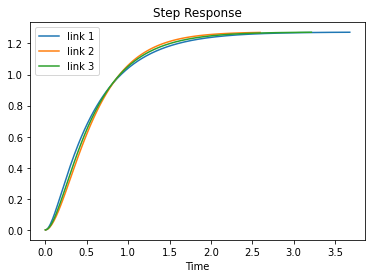

In [29]:
# for Link 1

Jeff = 0.01 + 0.00064*D_[0,0]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 1 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 1")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 2

Jeff = 0.07 + 0.00064*D_[1,1]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 2 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 2")
plt.xlabel('Time')
plt.title('Step Response')

# for Link 3

Jeff = 0.05 + 0.000064*D_[2,2]
Beff = 0.44
K = 0.8
Kp = 0.9
KI = 0.03
s = symbols('s')
# ohmega_s = Jeff*s**3 + Beff*s**2 + K*Kp*s + K*KI
G = control.tf([Kp, KI], [Jeff, Beff, K*Kp, K*KI])
print("For link 3 \n")
print("G = \n", G)
y,t = control.step(G)
plt.plot(t,y, label="link 3")
plt.xlabel('Time')
plt.title('Step Response')

plt.legend()